In [ ]:
from google.colab import drive    #mounting to google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Imports

In [ ]:
!pip install -q tflite-model-maker  #Installing Tensflow neural-network model maker 

     |████████████████████████████████| 577 kB 13.9 MB/s 
     |████████████████████████████████| 840 kB 20.6 MB/s 
     |████████████████████████████████| 238 kB 70.6 MB/s 
     |████████████████████████████████| 3.4 MB 56.2 MB/s 
     |████████████████████████████████| 77 kB 5.1 MB/s 
     |████████████████████████████████| 87 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 44.8 MB/s 
     |████████████████████████████████| 60.9 MB 112.6 MB/s 
     |████████████████████████████████| 1.3 MB 51.0 MB/s 
     |████████████████████████████████| 128 kB 77.3 MB/s 
     |████████████████████████████████| 10.9 MB 31.9 MB/s 
     |████████████████████████████████| 25.3 MB 1.1 MB/s 
     |████████████████████████████████| 497.9 MB 4.5 kB/s 
     |████████████████████████████████| 352 kB 84.4 MB/s 
     |████████████████████████████████| 462 kB 81.5 MB/s 
     |████████████████████████████████| 1.4 MB 70.2 MB/s 
     |████████████████████████████████| 5.8 MB 38.3 MB/s 
     |████████

In [ ]:
## @title Import Time Series Feature Extraction Library {form-width: "15%"}

import warnings
warnings.filterwarnings('ignore')
!pip install tsfel >/dev/null 2>&1
from sys import platform

# if platform == "linux" or platform == "linux2":
#     !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip >/dev/null 2>&1
# else:
#     !pip install wget >/dev/null 2>&1
#     import wget
#     wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI HAR Dataset.zip')

In [ ]:
 ! pip install tsfel   # install tsfel-time series feature extraction library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 !pip -q install plotly  #Installing tsfel -time series feature extraction library

In [ ]:
pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.6 MB/s 


In [ ]:
from chart_studio import plotly

In [ ]:
 #pip install matplotlib==3.1.3 # ALREADY INCLUDED IN COLAB

In [ ]:
# importing libraries and classifiers

import os 

import numpy as np
import pandas as pd
#import seaborn as sns

import tensorflow as tf
# assert tf.__version__.startswith('2')

# # from tflite_model_maker import model_spec
# from tflite_model_maker import image_classifier
# from tflite_model_maker.config import ExportFormat
# from tflite_model_maker.config import QuantizationConfig
# from tflite_model_maker.image_classifier import DataLoader

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

from scipy import signal                                       
from scipy.signal import butter, iirnotch, lfilter

import glob
import re
import tsfel  

import matplotlib.pyplot as plt

In [ ]:
# # How i imported the dat files into a list


# import re
# import tsfel  
 #import pandas as pd

# # Import individual files from folder

# covid_path =r'/content/drive/MyDrive/rand_data/COVID (1)'
#covid_filenames = glob.glob(covid_path + "/*.dat")

#covid_1=[]
#for filename in covid_filenames:
  # df_col_name=covid_filenames[33:-8]

#(pd.read_csv(filename ,header=None ,names=df_col_name))


# Import Data

In [ ]:
## How i imported the dat files into a list
# Import individual files from folder

# John's file path
covid_path =r'/content/drive/MyDrive/COVID (1)'
normal_path = r'/content/drive/MyDrive/Normal (1)'

# Andrew's file path
#covid_path = r'/content/drive/MyDrive/rand_data/COVID (1)' 
#normal_path = r'/content/drive/MyDrive/rand_data/Normal (1)'

covid_filenames = glob.glob(covid_path + "/*.dat")
normal_filenames = glob.glob(normal_path + "/*.dat")

covid_l=[]
normal_l=[]

for filename in covid_filenames:
  df_col_name = filename[33:-8]
  df_col_num = int(re.findall(r'\d+', df_col_name)[0])
  net_df = pd.read_csv(filename, header=None)
  net_df.columns = [df_col_num]
  covid_l.append(net_df)

for filename in normal_filenames:
  df_col_name = filename[34:-8]
  df_col_num = int(re.findall(r'\d+', df_col_name)[0])
  net_df = pd.read_csv(filename, header=None)
  net_df.columns = [df_col_num]
  normal_l.append(net_df)

In [ ]:
# concatenate list of dat files into one dataframe

net1 = pd.concat(covid_l,axis=1)
display(net1)
net11 = pd.concat(normal_l,axis=1)
display(net11)

,99,102,100,101,94,93,82,80,77,83,...,113,112,15,118,104,119,121,125,10,111
0,0.0966,0.1449,0.8694,-0.0966,0.5313,0.0483,2.4150,-0.3864,0.6762,-0.0483,...,0.0000,0.8211,0.6279,1.1592,0.2898,0.8211,1.0143,0.2898,1.4007,0.4830
1,0.0483,0.2415,0.8694,-0.1932,0.5796,0.0966,2.4150,-0.3864,0.6762,-0.0966,...,0.0483,0.8211,0.6279,1.0143,0.2415,0.7245,1.0626,0.1932,1.3041,0.5313
2,0.0000,0.2898,0.8694,-0.2415,0.6279,0.1449,2.0286,-0.3864,0.6762,-0.0483,...,0.0966,0.8694,0.6279,0.9177,0.1932,0.6762,1.0626,0.0966,1.2558,0.3864
3,0.0000,0.2415,0.8211,-0.2898,0.5796,0.1932,1.9803,-0.3864,0.6762,-0.0483,...,0.1449,0.8694,0.6279,0.8211,0.1932,0.6279,1.1109,0.0483,1.1592,0.3381
4,0.0000,0.2898,0.8211,-0.2898,0.6279,0.1449,1.8837,-0.3864,0.6279,-0.0483,...,0.0966,0.9177,0.6279,0.7728,0.1932,0.5796,1.0626,0.0966,1.0626,0.2898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,0.5796,0.2898,0.3864,0.6762,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.4007,-0.5313,NaN,-6.0375,0.0000,-6.8103,0.5313,0.3381,NaN,-0.5313
1842,0.6762,0.3864,0.4830,0.7728,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.4973,-0.2415,NaN,-6.1341,0.0966,-6.9069,0.4347,0.2415,NaN,-0.2415
1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.7728,-0.1449,NaN,-6.2307,NaN,-7.0035,-6.8103,-7.0035,NaN,-0.1449
1844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-9.8532,NaN,-10.6260,-10.4330,-10.6260,NaN,NaN


,97,63,89,51,53,99,64,77,96,76,...,106,110,120,121,10,103,262,131,116,108
0,-3.7674,-0.0966,0.3381,1.3524,1.1109,0.7728,0.0000,1.6905,-0.4347,2.6565,...,1.6422,0.2898,-0.0966,0.4347,0.2898,0.3381,0.3381,1.1592,0.5796,-2.5116
1,-3.8157,-0.1449,0.2898,2.4633,0.9177,0.4830,0.0483,1.6422,-0.4347,3.0429,...,1.5939,0.3381,-0.0483,0.4830,0.2415,0.3864,0.2898,1.0626,0.6279,-4.7334
2,-2.3667,-0.0966,0.8694,3.7674,0.7245,0.3381,0.0966,1.5456,-0.4347,2.7531,...,1.5456,0.3864,-0.0966,0.5313,0.2898,0.3381,0.3381,0.9177,0.6279,-4.7817
3,-1.6422,-0.0966,1.1109,3.8157,0.5313,0.2898,0.1449,1.4490,-1.5456,0.8211,...,1.4973,0.4830,-0.0966,-1.4973,0.2898,0.3381,0.3381,0.8694,0.6762,-2.8497
4,-1.1109,-1.6422,1.1592,3.0912,0.4347,0.1449,0.1932,-1.5939,-1.4973,-0.5313,...,1.4490,0.5313,-1.5456,-1.4490,-1.6422,-1.6905,-1.4007,0.7245,0.7245,-2.6082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.3381,-0.0966,0.1932,-0.1449,-0.4347,1.0626,0.7245,-0.1449,0.4830,-0.1932,...,0.0000,0.0000,1.9803,2.0286,1.5939,-0.1449,-0.0966,-0.5796,0.0966,-0.0483
497,0.2898,0.5313,0.6279,-0.0966,-0.3381,1.0143,0.7245,-0.2898,0.4347,-0.3381,...,0.9660,0.8694,0.9660,1.0143,2.3184,0.8211,0.1932,0.8694,0.8694,0.8211
498,0.2415,0.5796,-0.5313,0.5313,-0.1932,0.4347,0.7728,-0.4830,0.3864,-0.5313,...,0.3864,0.2898,0.3864,0.4347,3.1395,0.2415,0.8211,0.2898,0.2898,0.2415
499,-0.0483,0.0000,0.0000,3.5259,0.0000,0.1449,0.1932,0.0483,0.0966,0.0000,...,0.0966,0.0000,0.0966,0.1449,3.4776,-0.0483,1.7388,0.0000,0.0000,-0.0483


In [ ]:
# check the shape of covid and normal dataframe

net1.shape, net11.shape

((1846, 139), (501, 276))

# Data Preprocessing

In [ ]:
#s1 = pd.Series(['a', 'b' ,])
#print(s1)
#s2 = pd.Series(['c', 'd'])
#print(s2)
#pd.concat([s1, s2])

In [ ]:
#sorting out the columns

net2 = net1.copy()[sorted(net1.copy())]
display(net2)

net22 = net11.copy()[sorted(net11.copy())]
display(net22)

,1,2,3,4,5,6,7,8,9,10,...,130,131,132,133,134,135,136,137,138,154
0,4.5402,-0.0483,0.0000,0.8211,1.7871,-0.4830,2.3184,-0.1449,0.0,1.4007,...,-0.9660,-3.0429,0.3864,-0.8694,-0.0483,0.4347,-0.5796,0.3864,-0.2898,-0.0966
1,4.4919,-0.0483,0.0000,0.8211,1.6905,-0.5313,2.3184,-0.1449,0.0,1.3041,...,-1.0626,-3.1878,0.3864,-0.7728,-0.0483,0.2898,-0.6279,0.3381,-0.2898,-0.6279
2,4.3953,-0.0483,-0.0483,0.9177,1.7388,-0.4830,2.3184,-0.1932,0.0,1.2558,...,-1.1109,-3.2844,0.3864,-0.7245,-0.0483,0.1932,-0.6762,0.3864,-0.3381,-0.1932
3,4.3953,-0.0483,0.0000,1.0143,1.6905,-0.4830,2.3184,-0.1932,0.0,1.1592,...,-1.1592,-3.3327,0.3864,-0.6279,-0.0483,0.1932,-0.7245,0.3864,-0.3381,-0.0966
4,0.0000,-0.0483,-0.0483,1.9803,1.6422,-0.4830,2.3184,-0.1932,0.0,1.0626,...,-1.1109,-3.3810,0.3381,-0.6279,-0.0483,0.1449,-0.7245,0.3864,-0.3381,1.3041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.9695,8.5008,9.2253,8.0661,8.2593,8.0661,8.0661,2.4150,2.0286,NaN
1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.8246,8.3559,9.0804,7.9212,8.1144,7.9212,7.9212,8.4525,8.0661,NaN
1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.2450,-6.7137,-5.9892,-7.1484,-6.9552,-7.1484,-7.1484,-6.6171,-7.0035,NaN
1844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.8670,-10.3360,-9.6117,-10.7710,-10.5780,-10.7710,-10.7710,-10.2400,-10.6260,NaN


,1,2,3,4,5,6,7,8,9,10,...,267,268,269,270,271,272,273,274,275,276
0,0.0000,0.1932,0.0483,0.07245,1.0143,0.1932,2.2218,0.1932,0.0483,0.2898,...,0.4830,-0.1932,0.0966,0.0966,2.2218,0.0966,0.0966,0.6279,0.2415,0.4830
1,0.3864,0.2415,0.0000,0.02415,0.0000,0.0966,2.3184,0.1449,0.0966,0.2415,...,-0.6279,-0.0966,0.0483,0.0966,1.6422,0.0483,0.0483,0.6762,0.3864,0.5313
2,0.8694,0.2898,0.0483,-0.02415,-0.0966,0.0483,2.3667,0.1932,0.0966,0.2898,...,-0.7245,0.0000,0.0483,0.0966,1.4007,0.0000,0.0483,0.6762,0.9177,0.5796
3,0.9177,0.3381,0.0483,-0.02415,-0.2898,0.0000,2.4150,0.1932,-1.6422,0.2898,...,-1.0143,0.0966,-1.5939,0.0966,1.1592,0.0000,0.0483,-1.6422,0.9660,0.5796
4,1.2075,0.3864,-1.6905,-0.02415,-0.1932,0.0000,2.4150,-1.5456,-1.5939,-1.6422,...,-0.8211,0.1932,-1.5456,-1.4490,0.8694,-1.3524,-1.4490,-1.5939,0.4347,0.5796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,NaN,NaN,NaN,0.0000,2.1735,1.7388,1.6905,1.5939,1.5939,...,0.0483,-0.0483,0.1449,0.2898,0.1449,0.3864,0.2898,0.0966,-0.2898,-0.2898
497,NaN,NaN,NaN,NaN,NaN,2.8980,2.4633,2.4150,2.3184,2.3184,...,-0.0966,-0.1932,0.0000,0.1449,0.0000,0.2415,0.1449,-0.0483,0.0483,0.0483
498,NaN,NaN,NaN,NaN,NaN,3.7191,3.2844,3.2361,3.1395,3.1395,...,0.5313,0.4347,0.6279,0.7728,0.6279,0.8694,0.7728,0.5796,0.6762,0.6762
499,NaN,NaN,NaN,NaN,NaN,4.0572,3.6225,3.5742,3.4776,3.4776,...,1.4490,1.3524,1.5456,1.6905,1.5456,1.7871,1.6905,1.4973,1.5939,1.5939


## Plot of ECG data

In [ ]:
# To setup ECG plots

#import plotly.express as px
import ipywidgets as widgets 

cov_df = net2.copy().melt(var_name='ECG number', value_name='Covid ECG')
nor_df = net22.copy().melt(var_name='ECG number', value_name='Normal ECG')

In [ ]:
ecg=covid_path

## Data Wrangling

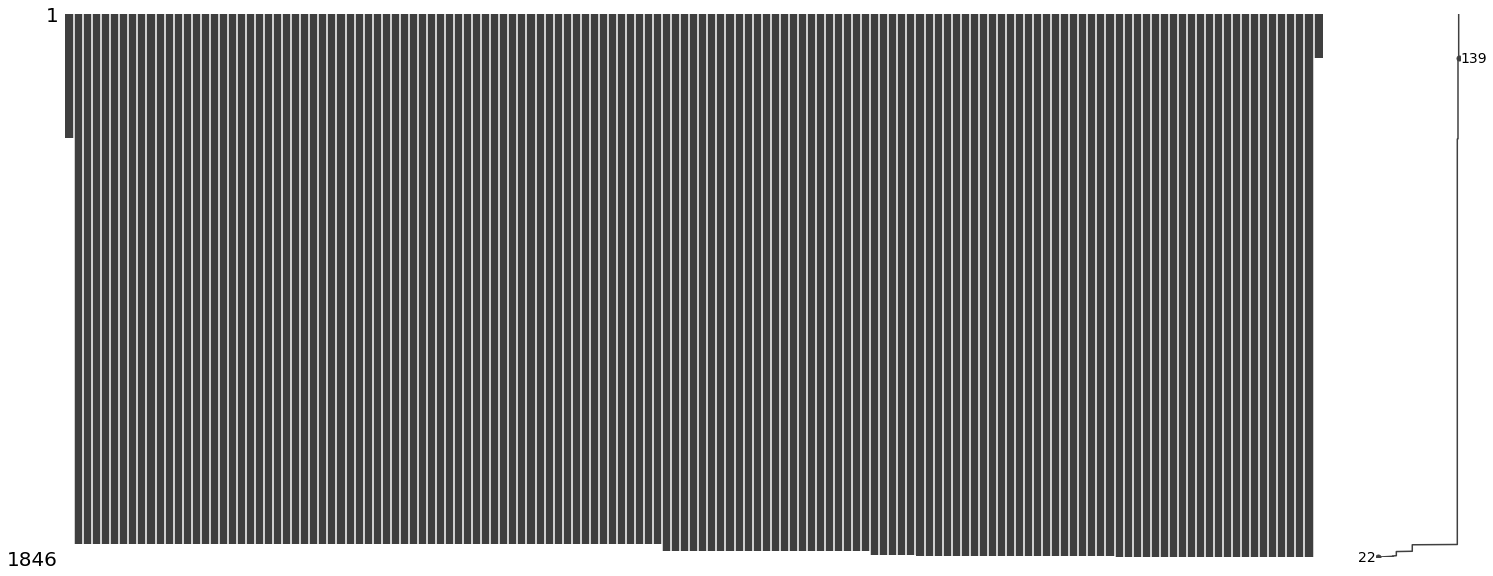

In [ ]:
# Visualize Nan 

import missingno
missingno.matrix(net2)
# missingno.matrix(net2.iloc[:,1:-1])

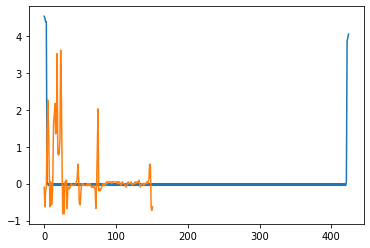

In [ ]:
# plot of first (blue) and last (orange) covid dataset

net2.iloc[:,0].plot()
net2.iloc[:,-1].plot()

In [ ]:
# remove covid data from column 1

net2_ = net2.iloc[:, 1:]
net2_

,2,3,4,5,6,7,8,9,10,11,...,130,131,132,133,134,135,136,137,138,154
0,-0.0483,0.0000,0.8211,1.7871,-0.4830,2.3184,-0.1449,0.0,1.4007,0.0,...,-0.9660,-3.0429,0.3864,-0.8694,-0.0483,0.4347,-0.5796,0.3864,-0.2898,-0.0966
1,-0.0483,0.0000,0.8211,1.6905,-0.5313,2.3184,-0.1449,0.0,1.3041,0.0,...,-1.0626,-3.1878,0.3864,-0.7728,-0.0483,0.2898,-0.6279,0.3381,-0.2898,-0.6279
2,-0.0483,-0.0483,0.9177,1.7388,-0.4830,2.3184,-0.1932,0.0,1.2558,0.0,...,-1.1109,-3.2844,0.3864,-0.7245,-0.0483,0.1932,-0.6762,0.3864,-0.3381,-0.1932
3,-0.0483,0.0000,1.0143,1.6905,-0.4830,2.3184,-0.1932,0.0,1.1592,0.0,...,-1.1592,-3.3327,0.3864,-0.6279,-0.0483,0.1932,-0.7245,0.3864,-0.3381,-0.0966
4,-0.0483,-0.0483,1.9803,1.6422,-0.4830,2.3184,-0.1932,0.0,1.0626,0.0,...,-1.1109,-3.3810,0.3381,-0.6279,-0.0483,0.1449,-0.7245,0.3864,-0.3381,1.3041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.9695,8.5008,9.2253,8.0661,8.2593,8.0661,8.0661,2.4150,2.0286,NaN
1842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.8246,8.3559,9.0804,7.9212,8.1144,7.9212,7.9212,8.4525,8.0661,NaN
1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.2450,-6.7137,-5.9892,-7.1484,-6.9552,-7.1484,-7.1484,-6.6171,-7.0035,NaN
1844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.8670,-10.3360,-9.6117,-10.7710,-10.5780,-10.7710,-10.7710,-10.2400,-10.6260,NaN


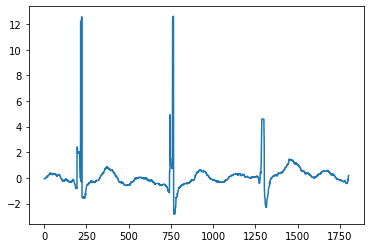

In [ ]:
net2_.iloc[:, 0].plot()

In [ ]:
#  Remove nans from covid

tem_l = [net2_.copy().loc[:,i].dropna().values for i in net2_.columns]
tem_l
# .loc[:, 1]

[array([-0.0483, -0.0483, -0.0483, ..., -0.1449,  0.1449,  0.1932]),
 array([ 0.    ,  0.    , -0.0483, ..., -0.1449,  0.1449,  0.1932]),
 array([ 0.8211,  0.8211,  0.9177, ..., -0.6762, -0.3864, -0.3381]),
 array([ 1.7871,  1.6905,  1.7388, ..., -0.3864, -0.0966, -0.0483]),
 array([-0.483 , -0.5313, -0.483 , ..., -0.9177, -0.6279, -0.5796]),
 array([ 2.3184,  2.3184,  2.3184, ..., -0.7728, -0.483 , -0.4347]),
 array([-0.1449, -0.1449, -0.1932, ..., -0.6762, -0.3864, -0.3381]),
 array([ 0.    ,  0.    ,  0.    , ..., -0.3381, -0.0483,  0.    ]),
 array([ 1.4007,  1.3041,  1.2558, ..., -0.2415,  0.0483,  0.0966]),
 array([ 0.    ,  0.    ,  0.    , ..., -0.483 , -0.1932, -0.1449]),
 array([ 0.    , -0.0966, -0.1449, ..., -1.1592, -0.8694, -0.8211]),
 array([ 3.0429,  3.1395,  3.4293, ..., -0.5796, -0.2898, -0.2415]),
 array([ 2.5116,  2.5116,  1.449 , ..., -0.4347, -0.1449, -0.0966]),
 array([ 0.6279,  0.6279,  0.6279, ..., -0.1932,  0.0966,  0.1449]),
 array([ 0.1449,  0.1449,  0.1449,

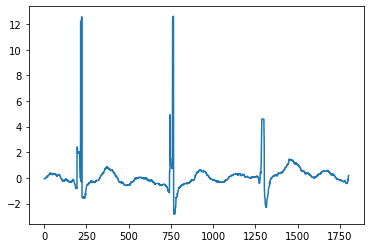

In [ ]:
plt.plot(tem_l[0])  #Plot Covid ECGs

In [ ]:
tem_ = np.concatenate(tem_l)
tem_.shape

(249620,)

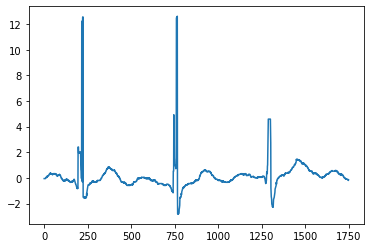

In [ ]:
plt.plot(tem_[0:1750])  

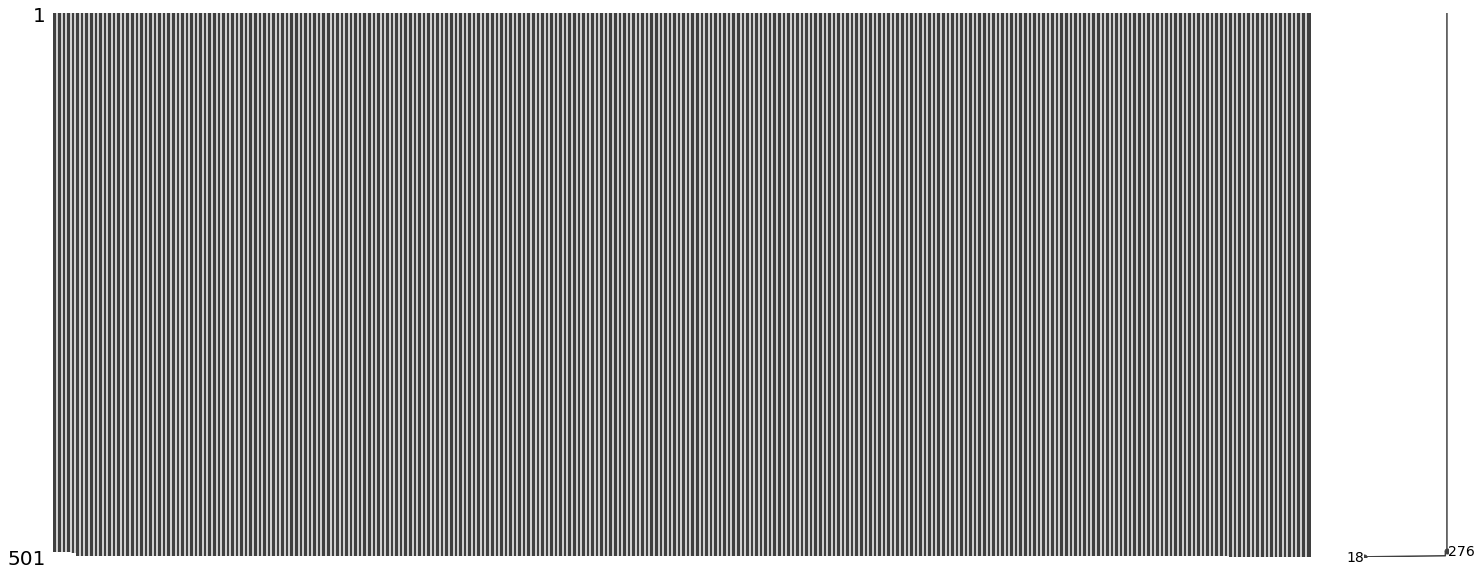

In [ ]:
missingno.matrix(net22)
#NaNs in normal Dataframe and  slicing and resize the shape to equivalence

In [ ]:
tem_l1 = [net22.copy().loc[:,i].dropna().values for i in net22.columns]
tem1_ = np.concatenate(tem_l1)
tem1_.shape

(137999,)

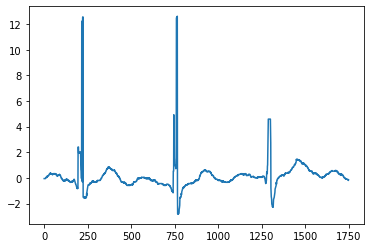

In [ ]:
covid_array= tem_
plt.plot(covid_array[0:1750])

In [ ]:
#covid_m=covid_array

In [ ]:
# Reduce covid and normal datasets to 249600, and 137600 respectively 
# in order to have a common factor of 3200. This will be the size of the window in datapoints.

# Reduce the dataset sizes
covid_array = tem_.copy()[0:249600]
normal_array = tem1_.copy()[0:137600]

# transform data array into shape with columns = window size (3200)
# The common factors are: 1, 2, 4, 5, 8, 10, 16, 20, 25, 32, 40, 50, 64, 80, 100, 128, 160, 200, 320, 400, 640, 800, 1600, 3200

window_size = 400

covid_m = np.reshape(covid_array,(-1, window_size))
normal_m = np.reshape(normal_array,(-1, window_size))

# Convert to dataframes
covid_df = pd.DataFrame(covid_m)
normal_df = pd.DataFrame(normal_m)

# Add health labels to data
health_label = np.asarray(['Covid','Normal'])
covid_df['state'] = 'Covid'
normal_df['state'] = 'Normal'

# making the covid and normal datasets with equivalent size
szn = normal_m.shape[0]         # size of normal dataset
# covid_df1 = covid_df.copy().sample(szn, random_state=12)
covid_df1 = covid_df.copy()

print('Size of covid and normal datasets')

Size of covid and normal datasets


In [ ]:
normal_df  #Normal(negative ) ECGs dataframe

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,state
0,0.00000,0.38640,0.86940,0.91770,1.20750,1.11090,0.96600,-1.44900,-1.40070,0.00000,...,0.19320,0.19320,0.19320,0.14490,0.19320,0.14490,0.19320,0.14490,0.09660,Normal
1,0.04830,0.04830,0.04830,0.00000,-0.04830,0.00000,-0.04830,0.00000,-0.04830,-0.04830,...,0.82110,0.82110,0.82110,0.86940,0.86940,0.91770,0.91770,0.96600,0.91770,Normal
2,0.96600,1.01430,0.96600,1.01430,0.96600,0.91770,0.86940,0.82110,0.67620,0.57960,...,-1.06260,-0.86940,-0.62790,-0.43470,-0.38640,-0.33810,-0.24150,-0.19320,-0.14490,Normal
3,-0.14490,-0.09660,-0.04830,0.00000,0.09660,0.24150,0.38640,0.33810,0.28980,0.28980,...,0.21735,0.26565,0.26565,0.26565,0.31395,0.36225,0.36225,0.36225,0.41055,Normal
4,0.41055,0.41055,0.41055,0.41055,0.36225,0.41055,0.36225,0.31395,0.36225,0.31395,...,-0.14490,-1.64220,-1.59390,1.35240,1.35240,1.30410,1.25580,1.11090,1.01430,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.04830,-0.09660,-0.19320,-0.24150,-0.38640,-0.43470,-0.48300,-0.48300,-0.48300,-0.53130,...,0.24150,0.86940,1.78710,2.99460,0.09660,0.04830,0.04830,0.04830,-1.44900,Normal
340,-1.40070,1.54560,1.54560,1.54560,1.44900,1.30410,1.20750,1.11090,0.96600,0.86940,...,3.76740,3.81570,3.38100,1.11090,0.19320,-0.24150,-0.28980,-0.43470,-0.48300,Normal
341,-0.43470,-0.38640,-0.43470,-0.38640,-0.33810,-0.38640,-0.38640,-0.38640,-0.33810,-0.28980,...,-0.19320,-0.14490,-0.19320,-0.14490,-0.19320,-0.14490,0.00000,0.04830,0.28980,Normal
342,0.62790,1.11090,1.44900,1.25580,1.15920,-0.09660,-1.01430,-1.54560,-1.73880,-1.83540,...,-0.09660,-0.14490,-0.19320,-0.19320,-0.19320,-0.24150,-0.19320,-0.24150,-0.19320,Normal


In [ ]:
covid_df  #Covid dataframe 

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,state
0,-0.0483,-0.0483,-0.0483,-0.0483,-0.0483,-0.0483,-0.0483,-0.0483,0.0000,0.0000,...,0.6279,0.6279,0.5796,0.5796,0.5796,0.5796,0.5796,0.5796,0.5796,Covid
1,0.5796,0.5796,0.6279,0.5796,0.6279,0.5796,0.5313,0.5313,0.4830,0.4830,...,-1.0626,-1.0143,-0.9660,-0.9177,-0.8694,-0.8211,-0.8211,-0.7728,-0.7245,Covid
2,-0.7728,-0.7245,-0.7728,-0.7245,-0.6762,-0.7245,-0.6762,-0.6762,-0.6279,-0.6279,...,0.0966,0.0966,0.0966,0.0966,0.0966,0.0966,0.0966,0.0966,0.0966,Covid
3,0.0966,0.1449,0.0966,0.0966,0.0966,0.0966,0.0483,0.0483,0.0483,0.0483,...,0.0483,0.0483,0.0483,0.0483,0.0483,0.0000,0.0483,0.0000,0.0483,Covid
4,0.0000,0.0483,0.0966,0.0483,0.0966,0.0483,0.0966,0.0966,0.0966,0.0966,...,-0.0966,-0.0966,-0.0966,-0.1449,-0.0966,-0.1449,-0.1932,-0.1449,-0.1932,Covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2.6082,2.6082,2.6082,2.6082,2.6082,2.6082,2.6082,2.6082,2.6082,2.6082,...,0.4347,0.4347,0.4347,0.4347,0.4347,0.4347,0.4347,0.4347,0.4830,Covid
620,0.4830,0.5313,0.5796,0.6279,0.6762,0.6762,0.7245,0.7245,0.7245,0.7245,...,-0.1932,-0.1449,-0.1449,-0.1449,-0.1449,-0.1449,-0.1932,-0.1932,-0.2415,Covid
621,-0.2415,-0.2415,-0.2415,-0.1932,-0.2415,-0.1932,-0.1449,-0.0966,-0.0483,-0.0483,...,-5.9409,-5.8926,-5.8443,-5.7960,-5.6511,-5.6994,-3.4293,-3.3327,-3.2844,Covid
622,-3.2361,-3.1878,-3.1395,-3.0429,-2.5116,-1.1592,-1.1109,-1.0626,-1.0143,-1.0143,...,0.0966,0.0483,0.0966,0.0966,0.1449,0.1449,0.1449,0.1449,0.1932,Covid


In [ ]:
# Combine preprocessed dataset

CovNorm_df = pd.concat([covid_df1, normal_df], ignore_index=True).sample(frac=1, random_state=7)
CovNorm_df.reset_index(drop=True, inplace=True)
CovNorm_df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,state
0,0.7245,0.8211,0.9177,1.0626,1.2075,0.0483,0.0483,0.0483,0.0000,0.0483,...,0.1449,0.0966,0.0966,0.0966,0.0966,0.0966,0.1449,0.0966,0.1449,Normal
1,0.7245,0.7245,0.6762,0.6762,0.6762,0.6762,0.6279,0.6279,0.5796,0.5796,...,-0.9660,-0.9177,3.7674,3.8157,3.7674,3.8157,3.7674,3.8157,3.7674,Covid
2,-0.0966,-0.0966,-0.1449,-0.1932,-0.1449,-0.1932,-0.1449,-0.1932,-0.1932,0.4347,...,-0.3381,-0.3381,-0.3381,-0.3864,-0.3381,-0.3864,-0.3864,-0.3864,-0.3864,Covid
3,0.0000,0.0483,0.0000,0.0483,0.0000,0.0483,0.0000,0.0483,0.0000,0.0483,...,-0.0483,-0.0966,-0.0483,-0.0483,-0.0483,-0.0483,-0.0483,-0.0483,0.0000,Covid
4,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0483,-0.0483,-0.0483,-0.0966,-0.0483,...,-0.0483,-0.0966,-0.1449,-0.1449,-0.1932,-0.2415,-0.2415,-0.2415,-0.2415,Covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0.8211,0.8211,0.8211,0.8211,0.8211,0.8211,0.8211,0.7728,0.7728,0.7245,...,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,Covid
964,-0.2415,-0.2415,-0.2415,-0.2415,-0.1932,-0.1932,-0.1449,-0.1932,-0.1449,-0.1932,...,-0.4830,-0.5313,-0.4830,-0.5313,-0.4830,-0.5313,-0.4830,-0.5313,-0.4830,Covid
965,0.0966,0.0966,0.0966,0.0966,0.0966,0.0966,0.0966,0.0966,0.0966,5.0232,...,0.1932,0.2415,0.2415,0.2415,0.2898,0.2415,0.2898,0.2415,0.2898,Covid
966,-0.1932,-0.2415,-0.1932,-0.2415,-0.1932,-0.2415,-0.1932,-0.1932,-0.1932,-0.1932,...,0.2898,0.3381,0.3381,0.3381,0.3864,0.3381,0.3864,0.4347,0.4347,Covid


In [ ]:
# CovNorm_df.to_csv('CovNorm1.csv', index_label=False)

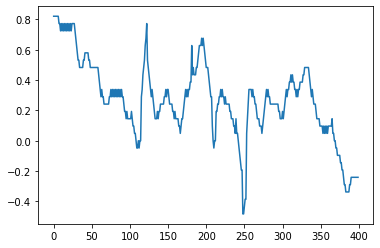

In [ ]:
CovNorm_df.iloc[-5,0:-1].plot()

In [ ]:
# split features and labels
X, y = CovNorm_df.copy().iloc[:,0:-1].values, CovNorm_df.copy().iloc[:,-1].values
# .astype('float64')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=0.25, stratify=y)

# label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Feature Extraction

In [ ]:
# Statistical Feature extraction

fs=500

#cfg_file = tsfel.get_features_by_domain()
#cfg_file = tsfel.get_features_by_domain('temporal')
#cfg_file = tsfel.get_features_by_domain('spectral')
cfg_file = tsfel.get_features_by_domain('statistical')

x_train_feat = tsfel.time_series_features_extractor(cfg_file, X_train, fs=fs)
x_test_feat = tsfel.time_series_features_extractor(cfg_file, X_test, fs=fs)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [ ]:
cfg_file    #extracted features

{'statistical': {'ECDF': {'complexity': 'log',
   'description': 'Computes the values of ECDF (empirical cumulative distribution function) along the time axis.',
   'function': 'tsfel.ecdf',
   'parameters': {'d': 10},
   'n_features': 'd',
   'use': 'yes'},
  'ECDF Percentile': {'complexity': 'log',
   'description': 'Determines the percentile value of the ECDF.',
   'function': 'tsfel.ecdf_percentile',
   'parameters': {'percentile': '[0.2, 0.8]'},
   'n_features': 'percentile',
   'use': 'yes'},
  'ECDF Percentile Count': {'complexity': 'log',
   'description': 'Determines the cumulative sum of samples that are less than the percentile.',
   'function': 'tsfel.ecdf_percentile_count',
   'parameters': {'percentile': '[0.2, 0.8]'},
   'n_features': 'percentile',
   'use': 'yes'},
  'Histogram': {'complexity': 'log',
   'description': 'Computes histogram of the signal.',
   'function': 'tsfel.hist',
   'parameters': {'nbins': 10, 'r': 1},
   'n_features': 'nbins',
   'use': 'yes'},
  '

# Feature selection

In [1]:
x_train_feat.columns.shape  

NameError: ignored

In [ ]:
# Highly correlated features are removed
corr_features = tsfel.correlated_features(x_train_feat)
x_train_feat.drop(corr_features, axis=1, inplace=True)
x_test_feat.drop(corr_features, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(x_train_feat)
X_test = selector.transform(x_test_feat)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train)
nX_test = scaler.transform(X_test)

In [ ]:
corr_features   #correlated features

In [ ]:
x_train_feat.columns.shape

In [ ]:
list(x_train_feat.columns)

# Classification

Random Forest

In [ ]:
# Random Forest Classifier

classifier_RF = RandomForestClassifier()
# Train the classifier
classifier_RF.fit(nX_train, y_train.ravel())

# Predict test data
y_test_predict = classifier_RF.predict(nX_test)

# Get the classification report
accuracy = accuracy_score(y_test, y_test_predict) * 100
print(classification_report(y_test, y_test_predict, target_names=health_label))
print("Accuracy: " + str(accuracy) + '%')

              precision    recall  f1-score   support

       Covid       0.87      0.94      0.90       156
      Normal       0.86      0.74      0.80        86

    accuracy                           0.87       242
   macro avg       0.87      0.84      0.85       242
weighted avg       0.87      0.87      0.87       242

Accuracy: 86.77685950413223%


In [ ]:
import seaborn as sns

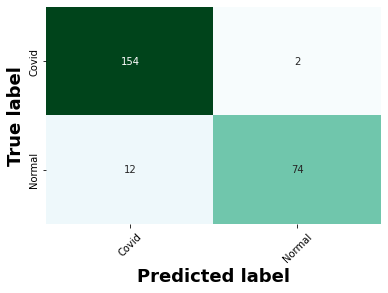

In [ ]:
# RF Confusion Matrix

cm = confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(cm, index=[i for i in health_label], columns=[i for i in health_label])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.show()

In [ ]:
# Standard parameters for RF

classifier_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Tune RF hyperparameters

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from pprint import pprint
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import StratifiedKFold

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [1, 2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


In [ ]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

4

In [ ]:
# Use the random grid to search for best hyperparameters

classifier_RF_tuned = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(
    estimator=classifier_RF_tuned, param_distributions=random_grid,
    n_iter = 100, cv = StratifiedKFold(n_splits=3), verbose=2, n_jobs=-1, 
    return_train_score=True

)

# Fit the random search model
rf_random.fit(nX_train, y_train.ravel());

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [ ]:
tem = rf_random.cv_results_
tem.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'param_max_depth', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
scores = pd.DataFrame(rf_random.cv_results_)[['param_max_depth', 'param_max_features', 'param_n_estimators','mean_test_score', 'mean_train_score', 'rank_test_score']]
scores1 = scores.copy().sort_values(by=['mean_train_score'])
scores1
# scores1[['mean_test_score','mean_train_score']].plot()

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,mean_train_score,rank_test_score
87,10,auto,100,0.893939,0.974518,62
35,80,sqrt,700,0.892562,0.975207,67
3,10,auto,1800,0.889807,0.975895,73
63,None,sqrt,1100,0.895317,0.976584,50
90,90,sqrt,500,0.896694,0.976584,42
...,...,...,...,...,...,...
77,80,sqrt,2000,NaN,NaN,86
79,80,sqrt,500,NaN,NaN,99
84,40,sqrt,100,NaN,NaN,82
85,70,sqrt,800,NaN,NaN,80


In [ ]:
#test_scores

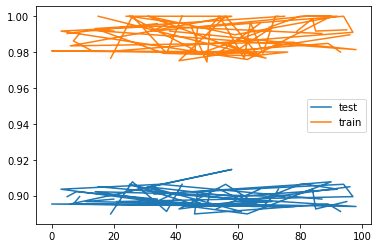

In [ ]:
test_scores = rf_random.cv_results_['mean_test_score']
train_scores = rf_random.cv_results_['mean_train_score'] 
x = scores1.index
# train_scores = rf_random.cv_results_['std_test_score'] 


plt.plot(x, test_scores, label='test')
plt.plot(x, train_scores, label='train')
plt.legend(loc='best')
plt.show()

**KNN Classification**

In [ ]:
# K Nearest Neighbors (KNN) Classification

from sklearn import neighbors
n_neighbors = 15

classifier_knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
# Train the classifier
classifier_knn.fit(nX_train, y_train.ravel())

# Predict test data
y_test_predict_knn = classifier_knn.predict(nX_test)

# Get the classification report
accuracy_knn = accuracy_score(y_test, y_test_predict_knn) * 100
print(classification_report(y_test, y_test_predict_knn, target_names=health_label))
print("Accuracy: " + str(accuracy_knn) + '%')

              precision    recall  f1-score   support

       Covid       0.90      0.74      0.81       156
      Normal       0.65      0.85      0.73        86

    accuracy                           0.78       242
   macro avg       0.77      0.80      0.77       242
weighted avg       0.81      0.78      0.79       242

Accuracy: 78.099173553719%


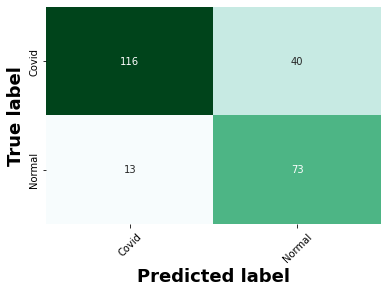

In [ ]:
# KNN Confusion Matrix

cm = confusion_matrix(y_test, y_test_predict_knn)
df_cm = pd.DataFrame(cm, index=[i for i in health_label], columns=[i for i in health_label])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.show()

**SVM Classification**

In [ ]:
# Support Vectro Machine (SVM) Classification

from sklearn import svm

classifier_svm = svm.NuSVC(gamma='auto')

# Train the classifier
classifier_svm.fit(nX_train, y_train)

# Predict test data
y_test_predict_svm = classifier_svm.predict(nX_test)

# Get the classification report
accuracy_svm = accuracy_score(y_test, y_test_predict_svm) * 100
print(classification_report(y_test, y_test_predict_svm, target_names=health_label))
print("Accuracy: " + str(accuracy_svm) + '%')

              precision    recall  f1-score   support

       Covid       0.93      0.91      0.92       156
      Normal       0.84      0.88      0.86        86

    accuracy                           0.90       242
   macro avg       0.89      0.90      0.89       242
weighted avg       0.90      0.90      0.90       242

Accuracy: 90.08264462809917%


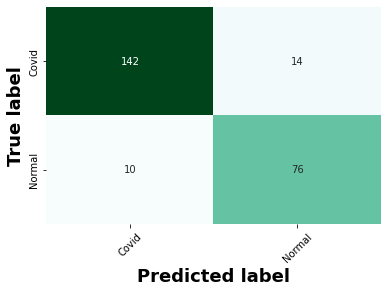

In [ ]:
# SVM Confusion Matrix

cm = confusion_matrix(y_test, y_test_predict_svm)
df_cm = pd.DataFrame(cm, index=[i for i in health_label], columns=[i for i in health_label])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.show()

# Older Code

In [ ]:
                               #Normal Patients Analysis


In [ ]:
import glob
import re

import pandas as pd
normal_path =r'/content/drive/MyDrive/Normal (1)'
normal_filenames = glob.glob(normal_path + "/*.dat")

normal_l=[]

for filename in normal_filenames:
  df_col_name = filename[33:-8]
  df_col_num = int(re.findall(r'\d+', df_col_name)[0])
  norm_df = pd.read_csv(filename, header=None)
  norm_df.columns = [df_col_num]
  normal_l.append(norm_df)

In [ ]:
set1=pd.concat(normal_l ,axis=1)   # Sort normal people dataframe columns
                                   # concatenate list of dat files into one dataframe
set1


,97,63,89,51,53,99,64,77,96,76,...,106,110,120,121,10,103,262,131,116,108
0,-3.7674,-0.0966,0.3381,1.3524,1.1109,0.7728,0.0000,1.6905,-0.4347,2.6565,...,1.6422,0.2898,-0.0966,0.4347,0.2898,0.3381,0.3381,1.1592,0.5796,-2.5116
1,-3.8157,-0.1449,0.2898,2.4633,0.9177,0.4830,0.0483,1.6422,-0.4347,3.0429,...,1.5939,0.3381,-0.0483,0.4830,0.2415,0.3864,0.2898,1.0626,0.6279,-4.7334
2,-2.3667,-0.0966,0.8694,3.7674,0.7245,0.3381,0.0966,1.5456,-0.4347,2.7531,...,1.5456,0.3864,-0.0966,0.5313,0.2898,0.3381,0.3381,0.9177,0.6279,-4.7817
3,-1.6422,-0.0966,1.1109,3.8157,0.5313,0.2898,0.1449,1.4490,-1.5456,0.8211,...,1.4973,0.4830,-0.0966,-1.4973,0.2898,0.3381,0.3381,0.8694,0.6762,-2.8497
4,-1.1109,-1.6422,1.1592,3.0912,0.4347,0.1449,0.1932,-1.5939,-1.4973,-0.5313,...,1.4490,0.5313,-1.5456,-1.4490,-1.6422,-1.6905,-1.4007,0.7245,0.7245,-2.6082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.3381,-0.0966,0.1932,-0.1449,-0.4347,1.0626,0.7245,-0.1449,0.4830,-0.1932,...,0.0000,0.0000,1.9803,2.0286,1.5939,-0.1449,-0.0966,-0.5796,0.0966,-0.0483
497,0.2898,0.5313,0.6279,-0.0966,-0.3381,1.0143,0.7245,-0.2898,0.4347,-0.3381,...,0.9660,0.8694,0.9660,1.0143,2.3184,0.8211,0.1932,0.8694,0.8694,0.8211
498,0.2415,0.5796,-0.5313,0.5313,-0.1932,0.4347,0.7728,-0.4830,0.3864,-0.5313,...,0.3864,0.2898,0.3864,0.4347,3.1395,0.2415,0.8211,0.2898,0.2898,0.2415
499,-0.0483,0.0000,0.0000,3.5259,0.0000,0.1449,0.1932,0.0483,0.0966,0.0000,...,0.0966,0.0000,0.0966,0.1449,3.4776,-0.0483,1.7388,0.0000,0.0000,-0.0483


In [ ]:
set2=set1.copy()[sorted(set1.copy())]
set2

,1,2,3,4,5,6,7,8,9,10,...,267,268,269,270,271,272,273,274,275,276
0,0.0000,0.1932,0.0483,0.07245,1.0143,0.1932,2.2218,0.1932,0.0483,0.2898,...,0.4830,-0.1932,0.0966,0.0966,2.2218,0.0966,0.0966,0.6279,0.2415,0.4830
1,0.3864,0.2415,0.0000,0.02415,0.0000,0.0966,2.3184,0.1449,0.0966,0.2415,...,-0.6279,-0.0966,0.0483,0.0966,1.6422,0.0483,0.0483,0.6762,0.3864,0.5313
2,0.8694,0.2898,0.0483,-0.02415,-0.0966,0.0483,2.3667,0.1932,0.0966,0.2898,...,-0.7245,0.0000,0.0483,0.0966,1.4007,0.0000,0.0483,0.6762,0.9177,0.5796
3,0.9177,0.3381,0.0483,-0.02415,-0.2898,0.0000,2.4150,0.1932,-1.6422,0.2898,...,-1.0143,0.0966,-1.5939,0.0966,1.1592,0.0000,0.0483,-1.6422,0.9660,0.5796
4,1.2075,0.3864,-1.6905,-0.02415,-0.1932,0.0000,2.4150,-1.5456,-1.5939,-1.6422,...,-0.8211,0.1932,-1.5456,-1.4490,0.8694,-1.3524,-1.4490,-1.5939,0.4347,0.5796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,NaN,NaN,NaN,0.0000,2.1735,1.7388,1.6905,1.5939,1.5939,...,0.0483,-0.0483,0.1449,0.2898,0.1449,0.3864,0.2898,0.0966,-0.2898,-0.2898
497,NaN,NaN,NaN,NaN,NaN,2.8980,2.4633,2.4150,2.3184,2.3184,...,-0.0966,-0.1932,0.0000,0.1449,0.0000,0.2415,0.1449,-0.0483,0.0483,0.0483
498,NaN,NaN,NaN,NaN,NaN,3.7191,3.2844,3.2361,3.1395,3.1395,...,0.5313,0.4347,0.6279,0.7728,0.6279,0.8694,0.7728,0.5796,0.6762,0.6762
499,NaN,NaN,NaN,NaN,NaN,4.0572,3.6225,3.5742,3.4776,3.4776,...,1.4490,1.3524,1.5456,1.6905,1.5456,1.7871,1.6905,1.4973,1.5939,1.5939


In [ ]:
!pip install ecg_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#ec1='/content/drive/MyDrive/COVID (1)/COVID100 (1).dat'
ec1 = glob.glob(ec1 + "/*.dat")

NameError: ignored

In [ ]:
ec1

In [ ]:

#load_data

In [ ]:
import ecg_plot

ecg = load_data() # load data should be implemented by yourself 
ecg_plot.plot(ecg, sample_rate = 500, title = 'ECG 12')
ecg_plot.show()


NameError: ignored

In [ ]:
import glob
import re

import pandas as pd
normal_path =r'/content/drive/MyDrive/Normal (1)'
normal_filenames = glob.glob(normal_path + "/*.dat")

normal_l=[]

for filename in normal_filenames:
  df_col_name = filename[33:-8]
  df_col_num = int(re.findall(r'\d+', df_col_name)[0])
  norm_df = pd.read_csv(filename, header=None)
  norm_df.columns = [df_col_num]
  normal_l.append(norm_df)

In [ ]:
# Melted the datframe(tem2) from wide to long format with column names = File Number and Normal Signals

set3 = set2.copy().melt(var_name='File Number', value_name='Normal Signals')
set3.dropna(inplace=True)
set3

,File Number,Normal Signals
0,1,0.0000
1,1,0.3864
2,1,0.8694
3,1,0.9177
4,1,1.2075
...,...,...
138271,276,-0.2898
138272,276,0.0483
138273,276,0.6762
138274,276,1.5939


In [ ]:
cfg = tsfel.get_features_by_domain() #extracting  domain features for normal patients

# Extract features for Covid datafiles 
a = set3['Normal Signals'].values
#X = tsfel.time_series_features_extractor(cfg, a)

#X_train = tsfel.time_series_features_extractor(cfg,a)
#X_test = tsfel.time_series_features_extractor(cfg, a)

In [ ]:
#X.dtypes

In [ ]:
cfg = tsfel.get_features_by_domain("statistical") #extracting temporal domain features for normal patients

# Extract features for Covid datafiles 
a = set3['Normal Signals'].values
#X = tsfel.time_series_features_extractor(cfg, a)

In [ ]:
#X

In [ ]:
#X.describe()

In [ ]:
#X['0_Kurtosis']

In [ ]:
cfg = tsfel.get_features_by_domain("spectral") #extracting statistical domain features for normal patients

# Extract features for Covid datafiles 
a = set3['Normal Signals'].values
X = tsfel.time_series_features_extractor(cfg, a)

*** Feature extraction started ***
26


In [ ]:
cfg = tsfel.get_features_by_domain("spectral") #extracting spectral domain features for normal patients

# Extract features for Covid datafiles 
a = set3['Normal Signals'].values
#X = tsfel.time_series_features_extractor(cfg, a)

In [ ]:
main_directory='/content/drive/MyDrive/COVID (1)'
cfg = tsfel.get_features_by_domain()
for filename in covid_filenames:
  net_df=pd.read_csv(filename,header=None)
  #X=tsfel.time_series_features_extractor(cfg,net_df,fs=1000,window_size=139,window_splitter=True)

In [ ]:
main_directory='/content/drive/MyDrive/Normal (1)'
cfg = tsfel.get_features_by_domain()
for filename in normal_filenames:
  set_df=pd.read_csv(filename,header=None)
  #X=tsfel.time_series_features_extractor(cfg,net_df,fs=1000,window_size=18,window_splitter=True)



**Deep Learning-Transfer Learning**

In [ ]:
#skewness of the dataset
#the deviation of the distribution of the data from a normal distribution
#+ve mean > median > mode
#-ve mean < median < mode
CovNorm_df.skew()
	

In [ ]:
#kurtosis of dataset
#identifies whether the tails of a given distribution contain extreme values
#Leptokurtic indicates a positive excess kurtosis
#mesokurtic distribution shows an excess kurtosis of zero or close to zero
#platykurtic distribution shows a negative excess kurtosis
CovNorm_df.kurtosis()

In [ ]:
#correlation for all features in the dataset
correlation_data =CovNorm_df.corr()
print(correlation_data)

          0         1         2         3         4         5         6    \
0    1.000000  0.966584  0.930993  0.875256  0.784455  0.746657  0.718535   
1    0.966584  1.000000  0.941861  0.897506  0.803681  0.767298  0.734448   
2    0.930993  0.941861  1.000000  0.894537  0.819614  0.795234  0.761133   
3    0.875256  0.897506  0.894537  1.000000  0.959251  0.922925  0.891107   
4    0.784455  0.803681  0.819614  0.959251  1.000000  0.963529  0.937623   
..        ...       ...       ...       ...       ...       ...       ...   
395 -0.013277 -0.013717 -0.011855 -0.010627 -0.011356 -0.011813 -0.009010   
396 -0.008552 -0.010371 -0.008128 -0.005413 -0.003715 -0.003589 -0.000728   
397 -0.019536 -0.021704 -0.020229 -0.016166 -0.014038 -0.013496 -0.011584   
398 -0.011132 -0.014085 -0.015128 -0.009258 -0.007393 -0.006768 -0.004056   
399 -0.002109 -0.004669 -0.005807  0.000638  0.002560  0.003971  0.007121   

          7         8         9    ...       390       391       392  \
0  

In [ ]:
# split features and labels
X, y = CovNorm_df.copy().iloc[:,0:-1].values, CovNorm_df.copy().iloc[:,-1].values
# .astype('float64')

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=0.25, stratify=y)

# label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# Highly correlated features are removed
corr_features = tsfel.correlated_features(x_train_feat)
x_train_feat.drop(corr_features, axis=1, inplace=True)
x_test_feat.drop(corr_features, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(x_train_feat)
X_test = selector.transform(x_test_feat)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train)
nX_test = scaler.transform(X_test)

Deep Learning Test

In [ ]:
from tensorflow import keras

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
#CNN
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [ ]:
#Reshape train and test data to (n_samples, 187, 1), where each sample is of size (187, 1)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (726, 23, 1)
X Test shape:  (242, 23, 1)


In [ ]:
# Highly correlated features are removed
corr_features = tsfel.correlated_features(x_train_feat)
x_train_feat.drop(corr_features, axis=1, inplace=True)
x_test_feat.drop(corr_features, axis=1, inplace=True)

# Remove low variance features
selector = VarianceThreshold()
X_train = selector.fit_transform(x_train_feat)
X_test = selector.transform(x_test_feat)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train)
nX_test = scaler.transform(X_test)



In [ ]:
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)

X Train shape:  (726, 23, 1)
X Test shape:  (242, 23, 1)


In [ ]:
# Create sequential model 
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(2,), strides=2, padding='same'))

cnn_model.add(Dropout(0.5))
#Flatten the output
#
#
#
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 1, activation='sigmoid')) 

In [ ]:
cnn_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
#cnn_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 23, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 23, 128)           24704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 128)           0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                        

In [ ]:
cnn_model_history =cnn_model.fit(X_train, y_train, epochs=50, batch_size = 10, validation_data = (X_test, y_test))


Epoch 1/50
73/73 [==============================] - 2s 15ms/step - loss: 1.0006 - accuracy: 0.6488 - val_loss: 0.5023 - val_accuracy: 0.7521
Epoch 2/50
73/73 [==============================] - 1s 12ms/step - loss: 0.5465 - accuracy: 0.7025 - val_loss: 0.5492 - val_accuracy: 0.6777
Epoch 3/50
73/73 [==============================] - 1s 11ms/step - loss: 0.5240 - accuracy: 0.7218 - val_loss: 0.4693 - val_accuracy: 0.7521
Epoch 4/50
73/73 [==============================] - 1s 10ms/step - loss: 0.4459 - accuracy: 0.7796 - val_loss: 0.4064 - val_accuracy: 0.8554
Epoch 5/50
73/73 [==============================] - 1s 11ms/step - loss: 0.3898 - accuracy: 0.8278 - val_loss: 0.2601 - val_accuracy: 0.8843
Epoch 6/50
73/73 [==============================] - 1s 10ms/step - loss: 0.3355 - accuracy: 0.8567 - val_loss: 0.2913 - val_accuracy: 0.8760
Epoch 7/50
73/73 [==============================] - 1s 11ms/step - loss: 0.3160 - accuracy: 0.8691 - val_loss: 0.2222 - val_accuracy: 0.9298
Epoch 8/50
73

Text(0, 0.5, 'Accuracy')

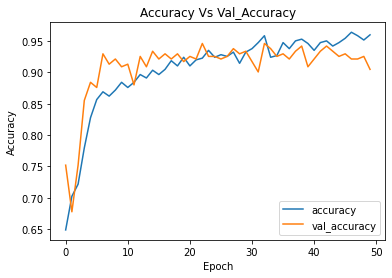

In [ ]:
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

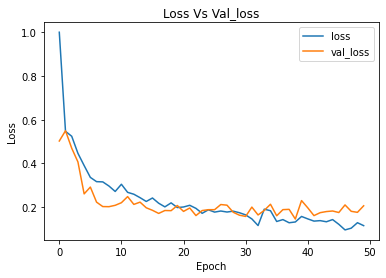

In [ ]:
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
from sklearn.metrics import classification_report



In [ ]:
print(confusion_matrix(y_test, y_test_predict))
   

[[146  10]
 [ 22  64]]


In [ ]:
 print(classification_report(y_test, y_test_predict, digits=4))

              precision    recall  f1-score   support

           0     0.8690    0.9359    0.9012       156
           1     0.8649    0.7442    0.8000        86

    accuracy                         0.8678       242
   macro avg     0.8670    0.8400    0.8506       242
weighted avg     0.8676    0.8678    0.8653       242

